In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read the data
stock_data = pd.read_csv("Market_Risk_Data_coded.csv")

In [2]:
stock_data.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,4/4/2016,218,302,386,121,171
2,11/4/2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC Limited    418 non-null    int64 
 2   Bharti Airtel  418 non-null    int64 
 3   Tata Motors    418 non-null    int64 
 4   DLF Limited    418 non-null    int64 
 5   Yes Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [4]:
# Ensure the dates are in proper format 
stock_data['Date'] = stock_data['Date'].str.replace('/', '-')
stock_data.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,4-4-2016,218,302,386,121,171
2,11-4-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [5]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d-%m-%Y')
stock_data.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,2016-03-28,217,316,386,114,173
1,2016-04-04,218,302,386,121,171
2,2016-04-11,215,308,374,120,171
3,2016-04-18,223,320,408,122,172
4,2016-04-25,214,319,418,122,175


In [6]:
# Set 'Date' as the index for time-series plotting
stock_data.set_index('Date', inplace=True)

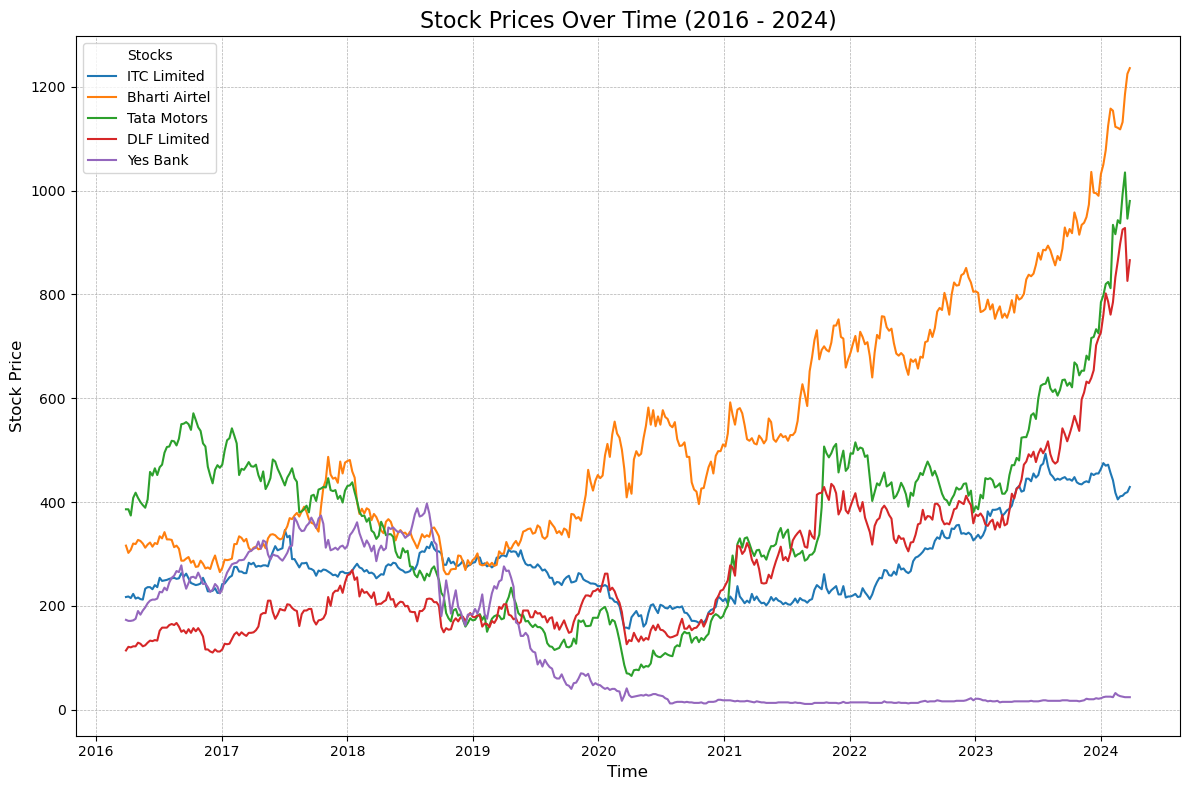

In [7]:
# Plot the stock prices over time
plt.figure(figsize=(12, 8))
for stock in stock_data.columns:
    plt.plot(stock_data.index, stock_data[stock], label=stock)

# Adding titles and labels
plt.title('Stock Prices Over Time (2016 - 2024)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend(title="Stocks")
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the graph
plt.show()

In [8]:
# Returns calculation for all stocks
stock_returns = stock_data.pct_change()

# Calculate mean and standard deviation of returns
mean_returns = stock_returns.mean()
std_dev_returns = stock_returns.std()

In [9]:
stock_returns.head()

,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
Date,,,,,
2016-03-28,NaN,NaN,NaN,NaN,NaN
2016-04-04,0.004608,-0.044304,0.000000,0.061404,-0.011561
2016-04-11,-0.013761,0.019868,-0.031088,-0.008264,0.000000
2016-04-18,0.037209,0.038961,0.090909,0.016667,0.005848
2016-04-25,-0.040359,-0.003125,0.024510,0.000000,0.017442


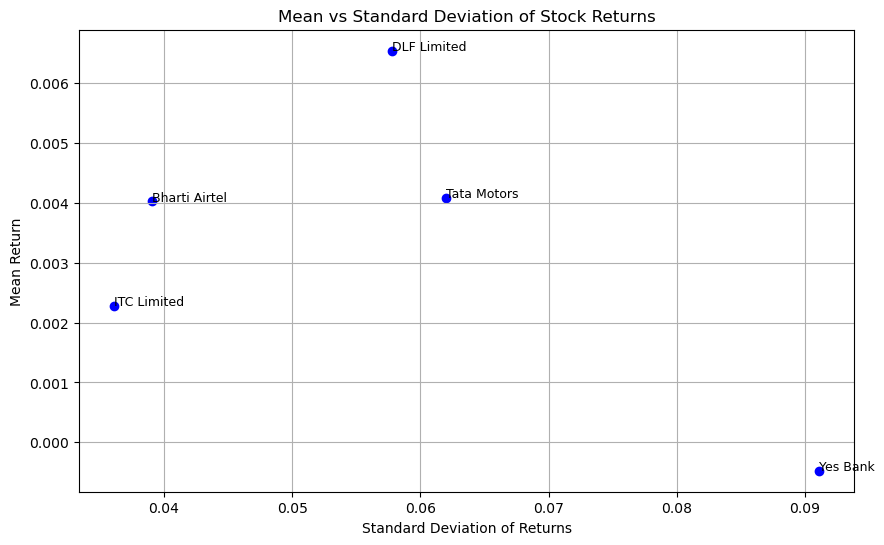

Mean Returns:
ITC Limited      0.002281
Bharti Airtel    0.004029
Tata Motors      0.004088
DLF Limited      0.006540
Yes Bank        -0.000475
dtype: float64

Standard Deviations:
ITC Limited      0.036127
Bharti Airtel    0.039073
Tata Motors      0.061976
DLF Limited      0.057796
Yes Bank         0.091095
dtype: float64


In [10]:
# Create a DataFrame for easier plotting
risk_metrics = pd.DataFrame({
    'Mean Return': mean_returns,
    'Standard Deviation': std_dev_returns
})

# Plot Mean vs Standard Deviation
plt.figure(figsize=(10, 6))
plt.scatter(risk_metrics['Standard Deviation'], risk_metrics['Mean Return'], color='blue')
for i, txt in enumerate(risk_metrics.index):
    plt.annotate(txt, (risk_metrics['Standard Deviation'][i], risk_metrics['Mean Return'][i]), fontsize=9)
plt.title('Mean vs Standard Deviation of Stock Returns')
plt.xlabel('Standard Deviation of Returns')
plt.ylabel('Mean Return')
plt.grid()
#plt.axhline(0, color='red', linestyle='--')  # Reference line at y=0
plt.show()

# Print mean and standard deviation values
print("Mean Returns:")
print(mean_returns)
print("\nStandard Deviations:")
print(std_dev_returns)